<a href="https://colab.research.google.com/github/Siaan/variance_reduction/blob/main/research_poc_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proof of Concept

Experiment (1): 

*   Generate epsilon samples from a {gaussian, laplace} dist.
*   Use epsilon values to generate latent z 
*   Do distributions coincide?










In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [49]:
mean = np.asarray([0, 0])
cov = np.asarray([[1, 0], [0, 1]])
epsilons = np.random.multivariate_normal(mean, cov, 300) #sample epsilons
mean = mean.reshape(2,1)

In [3]:
epsilons.shape

(300, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


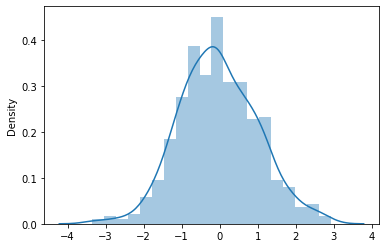

In [43]:
sns.distplot(epsilons)

In [50]:
z = mean + np.dot(cov,epsilons.T) #generate z from epsilons
z = z.T

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


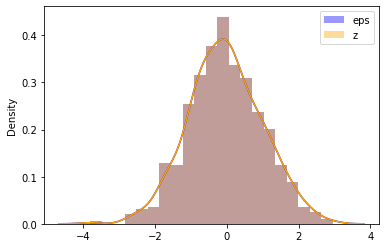

In [63]:
fig, ax = plt.subplots()
sns.distplot(epsilons, color='blue', label='eps', ax=ax)
sns.distplot(z, color ='orange', label='z', ax=ax)
plt.legend()

# Laplace

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


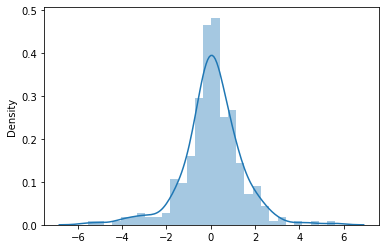

In [79]:
mean = 0
scale = 1.
epsilons = np.random.laplace(mean, scale, 300) #generate epsilons
sns.distplot(epsilons)

In [10]:
epsilons.shape

(300,)

In [81]:
z = (1/2 * scale) * np.exp(-abs(epsilons-mean)/scale)
z.shape

(300,)

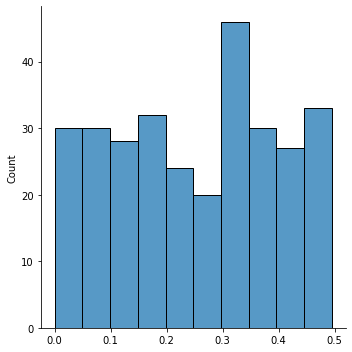

In [12]:
sns.displot(z, kde_kws=dict(bw=0.5))


# Experiment (2):

*   Generate samples from {Gaussian, Laplace} distribution
*   Generate z indepdently of these samples
*   Do these distributions coincide?








In [65]:
mean = np.asarray([0, 0])
cov = np.asarray([[1, 0], [0, 1]])
epsilons = np.random.multivariate_normal(mean, cov, 300)
#mean = mean.reshape(2,1)

mean = np.asarray([0, 0])
cov = np.asarray([[1, 0], [0, 2]])
z = np.random.multivariate_normal(mean, cov, 300)

In [66]:
epsilons.shape

(300, 2)

In [67]:
z.shape

(300, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


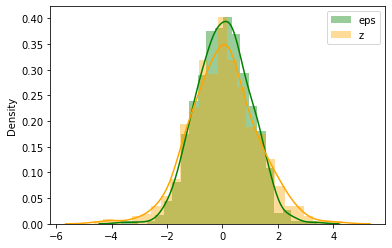

In [71]:
fig, ax = plt.subplots()
sns.distplot(epsilons, color='green', label='eps', ax=ax)
sns.distplot(z, color ='orange', label='z', ax=ax)
plt.legend()

# Laplace

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


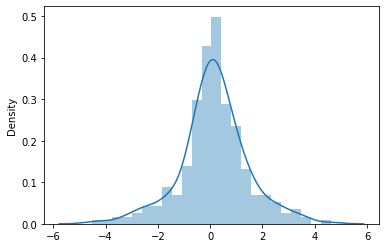

In [82]:
#generate epsilons
mean = 0
scale = 1.
epsilons = np.random.laplace(mean, scale, 300) #generate epsilons
sns.distplot(epsilons)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


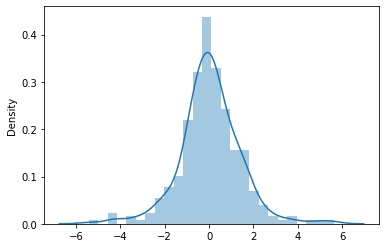

In [85]:
#generate z
mean = 0
scale = 1.
z = np.random.laplace(mean, scale, 300) #generate epsilons
sns.distplot(z)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


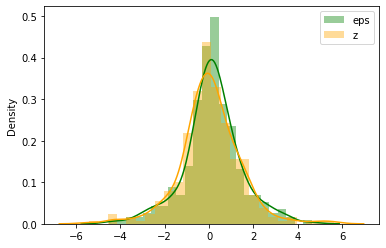

In [86]:
#both distributions
fig, ax = plt.subplots()
sns.distplot(epsilons, color='green', label='eps', ax=ax)
sns.distplot(z, color ='orange', label='z', ax=ax)
plt.legend()